## zigzag debug

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
    
def nan2zero(data):
    """ Replace NaNs and negative values by zeros
    """
    return [val if val>0 else 0 for val in data]

In [4]:
def uppack_header(header_dict):
    sx,sy = test['step_xy_deg']
    SpectImg = test['SpectImg']
    n_spect = test['n_spect']
    dx,dy = test['size_xy']
    t_int_s = test['t_int_s']
    wavelengths_nm = test['wavelengths_nm']
    return sx,sy,n_spect,dx,dy,t_int_s,SpectImg,wavelengths_nm

In [5]:
def unPickle(filename):
    '''
    to shorten 3 lines into 1 line
    '''
    with open(filename,'rb') as f:
        output = pickle.load(f)
    f.close()
    return output

def makePickle(filename,data):
    with open(filename,'wb') as f:
        pickle.dump(data,f)
    f.close()

In [6]:
import pickle

In [141]:
input_dict ='./header&SpecImg_2024-6-17_11:37:14.pkl'

In [142]:
test = unPickle(input_dict)

In [143]:
f_name = input_dict.strip('.pkl').split('_')

In [144]:
fig_title = f_name[-2]+'_'+f_name[-1]

In [145]:
sx,sy,n_spect,dx,dy,t_int_s,SpectImg,wavelengths_nm = uppack_header(test)

In [146]:
t_int_s

0.00249

In [147]:
SpectImg = SpectImg.reshape((dy//sy+1,dx//sx+1,n_spect))
## reorganize the pixel in the odd r
for row in range(dy//sy+1):
    if row%2==1:
        SpectImg[row] = SpectImg[row][::-1]

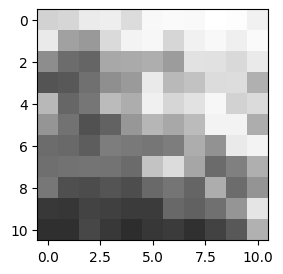

In [148]:
imgMono = np.zeros((dy//sy+1,dx//sx+1,3))
img = np.trapz(SpectImg)
img /= img.max()
for iCh in range(3):
    imgMono[:,:,iCh] = img.reshape((dy//sy+1,dx//sx+1))
    
fig, (ax1) = plt.subplots(1, 1, figsize=(9,3))
im1 = ax1.imshow(imgMono)    

In [149]:
SpectImgN = np.copy(SpectImg)
SpectImgN -= SpectImg.min()
SpectImgN /= SpectImg.max()

Text(0.5, 0, '[nm]')

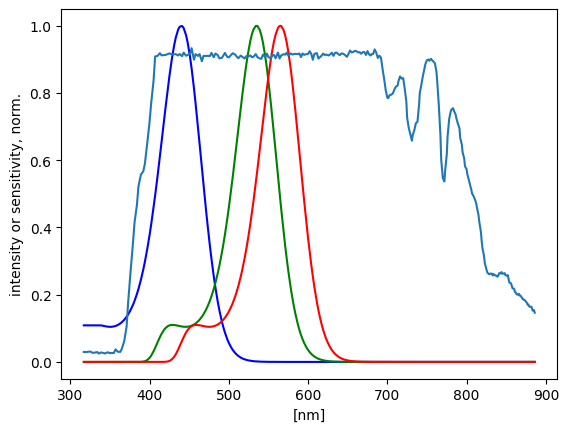

In [150]:
opsin_nm = np.load("opsins/wavelengths_nm.npz")["nm"]
tempData = np.load("opsins/human_SML.npz")

opsin_hSI = np.interp(wavelengths_nm, opsin_nm, nan2zero(tempData["s"]))
opsin_hMI = np.interp(wavelengths_nm, opsin_nm, nan2zero(tempData["m"]))
opsin_hLI = np.interp(wavelengths_nm, opsin_nm, nan2zero(tempData["l"]))

plt.plot(wavelengths_nm, opsin_hSI, "b")
plt.plot(wavelengths_nm, opsin_hMI, "g")
plt.plot(wavelengths_nm, opsin_hLI, "r")
plt.plot(wavelengths_nm, SpectImgN[0,0])
plt.ylabel("intensity or sensitivity, norm.")
plt.xlabel("[nm]")

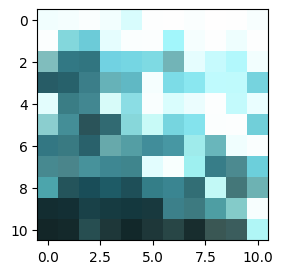

In [151]:
dx, dy, n = SpectImg.shape
imgRGB = np.zeros((dx, dy, 3))

s = opsin_hSI *SpectImgN
img_s = np.trapz(s)
imgRGB[:,:,0] = img_s /img_s.max()
m = opsin_hMI *SpectImgN
img_m = np.trapz(m)
imgRGB[:,:,1] = img_m /img_m.max()
l = opsin_hLI *SpectImgN
img_l = np.trapz(l)
imgRGB[:,:,2] = img_l /img_l.max()

#img /= img.max()
fig, (ax1) = plt.subplots(1, 1, figsize=(9,3))
im1 = ax1.imshow(imgRGB)    

### visualize all 3 together

In [152]:
SpectImgN.shape

(11, 11, 288)

Text(0.5, 0.98, 'start_t_2024-6-17_11:37:14,Int_t_0.00249sec')

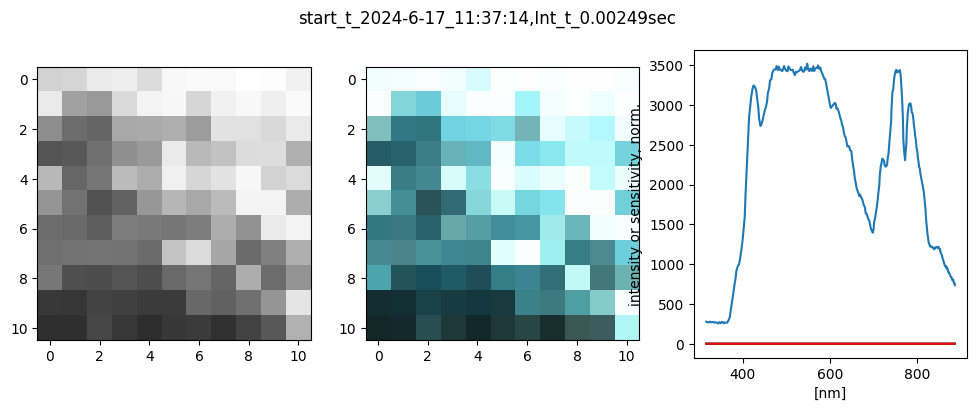

In [164]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(imgMono)
ax[1].imshow(imgRGB)

ax[2].plot(wavelengths_nm, opsin_hSI, "b")
ax[2].plot(wavelengths_nm, opsin_hMI, "g")
ax[2].plot(wavelengths_nm, opsin_hLI, "r")
ax[2].plot(wavelengths_nm, SpectImg[5,5])
ax[2].set_ylabel("intensity or sensitivity, norm.")
ax[2].set_xlabel("[nm]")
fig.suptitle('start_t_{},Int_t_{}sec'.format(fig_title,t_int_s))

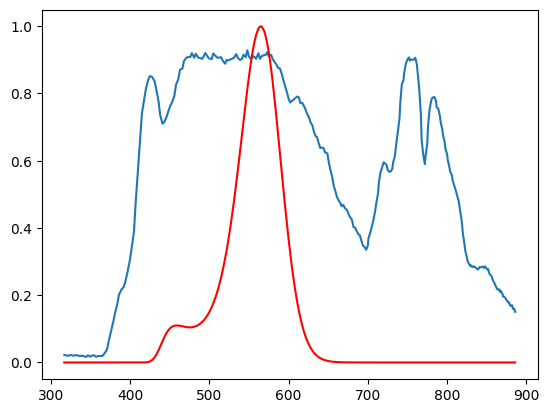

In [166]:
# plt.plot(wavelengths_nm,SpectImgN[20,20])
plt.plot(wavelengths_nm,SpectImgN[5,5])
plt.plot(wavelengths_nm, opsin_hLI, "r")


In [98]:
t_int_s

0.0001

In [22]:
SpectImg.shape

(21, 21, 288)

In [23]:
plt.plot(wavelengths_nm,SpectImg[0,40])

IndexError: index 40 is out of bounds for axis 1 with size 21

In [33]:
np.where(wavelengths_nm==550.)

(array([92]),)

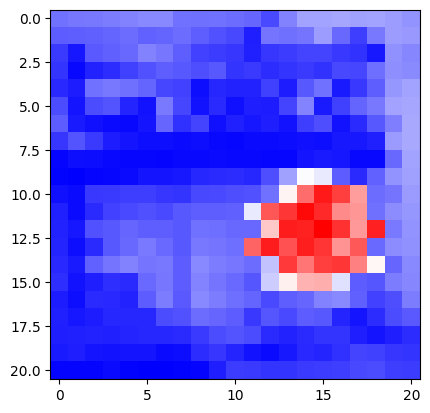

In [34]:

plt.imshow(SpectImgN[:,:,90],cmap = 'bwr')